In [132]:
import numpy as np
import pandas as pd
import matplotlib

from matplotlib import patches
from matplotlib import lines
import matplotlib.pyplot as plt
import pickle
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.nddata.utils import Cutout2D
import scipy.stats as stats
import sys
from scipy.ndimage import uniform_filter
from astropy.table import Table
from astropy.cosmology import Planck13






import tensorflow as tf

import tensorflow_probability as tfp

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

tfd = tfp.distributions
tfpl = tfp.layers
tfk = tf.keras
tfkl = tf.keras.layers



%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Let's first generate some data...

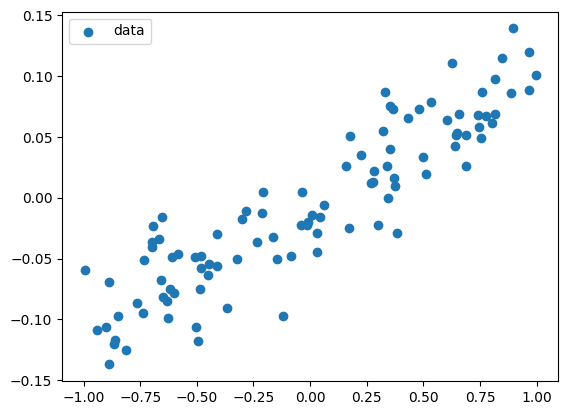

In [133]:
x = np.random.uniform(-1,1,100)
y = 0.1*x+np.random.normal(0,0.025,100)
plt.scatter(x,y,label='data')
plt.legend()
plt.show()

# The standard way to deal with this, is through linear regression

[ 0.10436954 -0.00664579]


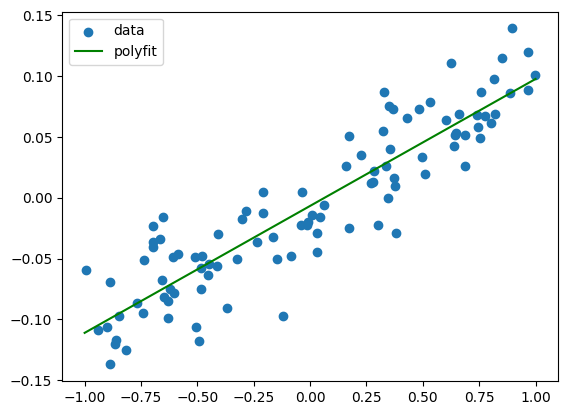

In [134]:
res = np.polyfit(x,y,1)
print(res)
plt.scatter(x,y,label='data')
plt.plot(np.linspace(-1,1),np.linspace(-1,1)*res[0]+res[1],color='green',label='polyfit')
plt.legend()
plt.show()

# Now, let's try to write the linear regression in a different way (more complicated way)

In [135]:
tfk = tf.keras
tfkl = tf.keras.layers
tfpl = tfp.layers
tfd = tfp.distributions

ann = tfk.Sequential([
tfk.layers.Input((1,)),
tfkl.Dense(1, activation=None)])


The Dense command here, onnly says that the input is multiplied by a parameter $w$. We are effectively writing a simple model for our data: $y = w.a+b$, where $w$ is unknown.
![alt](https://drive.google.com/uc?id=1Rt2bNPCxaHXdjzmVS7TCw_u_Ur-WIqlW)

We can visualize the model we just created.

In [136]:
ann.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_59 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


 # We then compile

In [137]:
ann.compile(optimizer=tf.optimizers.Adam(),loss='mse')

We are simply tht we want to minimize the mean square error (mse) between input and output. We call this the "loss function". So we are looking for the value of $w$ that minimizes the following expression: $$ \sum(x-w.x)^2$$

# And fit the model ...

In [138]:
# you might need to run this cell a couple of times if it does not work directly
hist = ann.fit(x,y,batch_size=1,epochs=20)

Epoch 1/20
100/100 [==============================] - 0s 1ms/step - loss: 0.0712
Epoch 2/20
100/100 [==============================] - 0s 1ms/step - loss: 0.0503
Epoch 3/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0348
Epoch 4/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0235
Epoch 5/20
100/100 [==============================] - 0s 1ms/step - loss: 0.0154
Epoch 6/20
100/100 [==============================] - 0s 1ms/step - loss: 0.0098
Epoch 7/20
100/100 [==============================] - 0s 1ms/step - loss: 0.0061
Epoch 8/20
100/100 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 9/20
100/100 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 10/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 11/20
100/100 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 12/20
100/100 [==============================] - 0s 1ms/step - loss: 9.7879e-04
Epoch 13/20
100/100 [

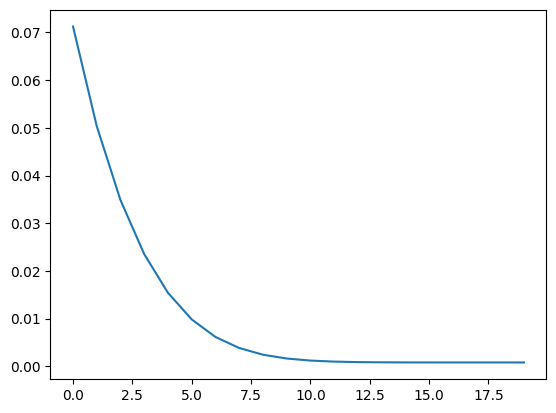

In [139]:
plt.plot(hist.epoch, hist.history['loss'])

# Let's see what we got here...

2/2 [==============================] - 0s 4ms/step


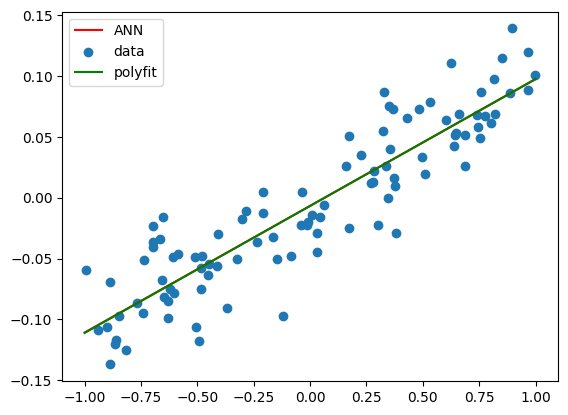

In [140]:
xp = np.linspace(-1,1)
yp = ann.predict(xp)
plt.plot(xp,yp,color='red',label='ANN')
plt.scatter(x,y,label='data')
plt.plot(np.linspace(-1,1),np.linspace(-1,1)*res[0]+res[1],color='green',label='polyfit')
plt.legend()

We have performed a linear regression with and artifical neural network ! So, yes, linear regression IS also Machine Learning...

# But why is this useful ?

Let's suppose we have a more complex dataset...

In [141]:
x = np.random.uniform(-1,1,100)
y = 0.1*x+np.sin(5*x)+np.random.normal(0,0.45*np.abs(x),100)

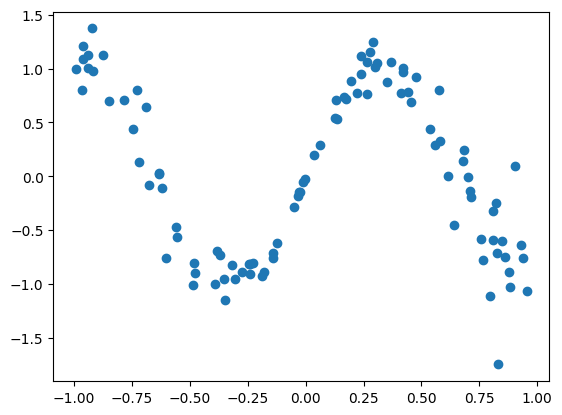

In [142]:
plt.scatter(x,y)
plt.show()

# I can try again simple linear regression ...

[-0.25286235  0.04851636]


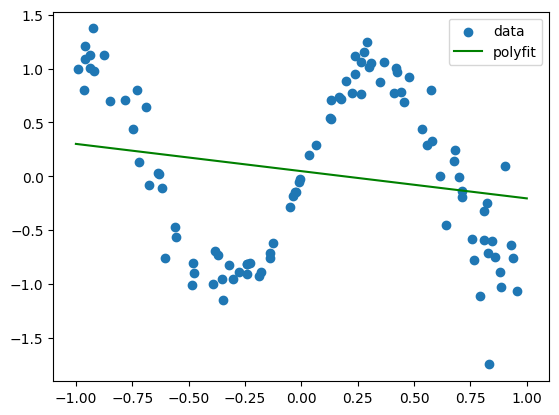

In [143]:
res = np.polyfit(x,y,1)
print(res)
plt.scatter(x,y,label='data')
plt.plot(np.linspace(-1,1),np.linspace(-1,1)*res[0]+res[1],color='green',label='polyfit')
plt.legend()
plt.show()

but that will not work super well as expected...

# Let's go back to our complicated ANN ...

In [144]:
tfd = tfp.distributions
tfpl = tfp.layers
tfk = tf.keras
tfkl = tf.keras.layers

ann = tfk.Sequential([
tfkl.Input((1,)),
tfkl.Dense(1, activation=None)])
ann.compile(optimizer=tf.optimizers.Adam(),loss='mse')
ann.fit(x,y,batch_size=1,epochs=50)

Epoch 1/50
100/100 [==============================] - 0s 1ms/step - loss: 0.7346
Epoch 2/50
100/100 [==============================] - 0s 1ms/step - loss: 0.7181
Epoch 3/50
100/100 [==============================] - 0s 1ms/step - loss: 0.7045
Epoch 4/50
100/100 [==============================] - 0s 1ms/step - loss: 0.6915
Epoch 5/50
100/100 [==============================] - 0s 1ms/step - loss: 0.6797
Epoch 6/50
100/100 [==============================] - 0s 1ms/step - loss: 0.6703
Epoch 7/50
100/100 [==============================] - 0s 1ms/step - loss: 0.6595
Epoch 8/50
100/100 [==============================] - 0s 1ms/step - loss: 0.6517
Epoch 9/50
100/100 [==============================] - 0s 1ms/step - loss: 0.6436
Epoch 10/50
100/100 [==============================] - 0s 1ms/step - loss: 0.6366
Epoch 11/50
100/100 [==============================] - 0s 1ms/step - loss: 0.6308
Epoch 12/50
100/100 [==============================] - 0s 1ms/step - loss: 0.6251
Epoch 13/50
100/100 [====

2/2 [==============================] - 0s 5ms/step


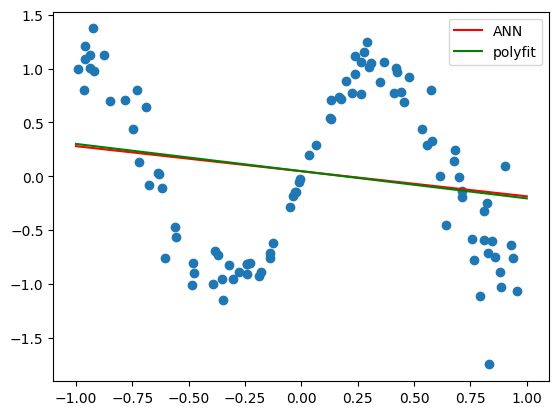

In [145]:
xp = np.linspace(-1,1)
yp = ann.predict(xp)
plt.plot(xp,yp,color='red',label='ANN')
plt.plot(np.linspace(-1,1),np.linspace(-1,1)*res[0]+res[1],color='green',label='polyfit')
plt.scatter(x,y)
plt.legend()

If I do not change anything, I will obtain the same result. My model is simply linear...

# Let's add a bit of non-linearity ...

In [146]:
tfd = tfp.distributions
tfpl = tfp.layers
tfk = tf.keras
tfkl = tf.keras.layers

ann = tfk.Sequential([
tfkl.Input((1,)),
tfkl.Dense(1, activation='sigmoid')])


The sigmoid function is given by this expression: $$ \frac{1}{1+e^{-x}}$$
So our model is now like this:![alt](https://drive.google.com/uc?id=1-2VbatzRnqGJMKCga-tppiTo6iPRBr9s)
This is what we call a perceptron. The non-linear function added after the linear combination is also called the activation function, because "it fires the unit".

In [147]:
ann.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [148]:
ann.compile(optimizer=tf.optimizers.Adam(),loss='mse')
ann.fit(x,y,batch_size=1,epochs=50)

Epoch 1/50
100/100 [==============================] - 0s 1ms/step - loss: 0.8538
Epoch 2/50
100/100 [==============================] - 0s 1ms/step - loss: 0.8411
Epoch 3/50
100/100 [==============================] - 0s 1ms/step - loss: 0.8285
Epoch 4/50
100/100 [==============================] - 0s 1ms/step - loss: 0.8167
Epoch 5/50
100/100 [==============================] - 0s 1ms/step - loss: 0.8048
Epoch 6/50
100/100 [==============================] - 0s 1ms/step - loss: 0.7937
Epoch 7/50
100/100 [==============================] - 0s 1ms/step - loss: 0.7832
Epoch 8/50
100/100 [==============================] - 0s 1ms/step - loss: 0.7733
Epoch 9/50
100/100 [==============================] - 0s 1ms/step - loss: 0.7636
Epoch 10/50
100/100 [==============================] - 0s 1ms/step - loss: 0.7548
Epoch 11/50
100/100 [==============================] - 0s 1ms/step - loss: 0.7460
Epoch 12/50
100/100 [==============================] - 0s 1ms/step - loss: 0.7380
Epoch 13/50
100/100 [====

2/2 [==============================] - 0s 4ms/step


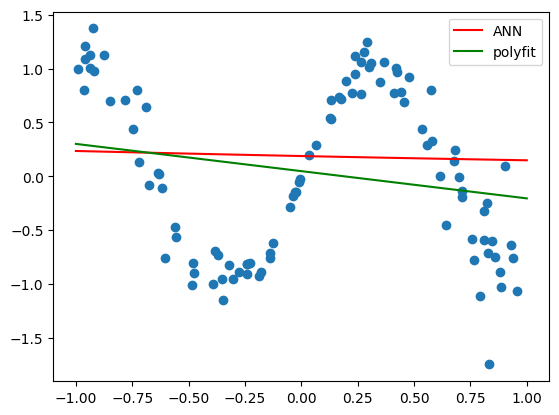

In [149]:
xp = np.linspace(-1,1)
yp = ann.predict(xp)
plt.plot(xp,yp,color='red',label='ANN')
plt.plot(np.linspace(-1,1),np.linspace(-1,1)*res[0]+res[1],color='green',label='polyfit')
plt.scatter(x,y)
plt.legend()

Still not great, but there is some potential !?

# We are going to work a bit more on the model

In [150]:
tfd = tfp.distributions
tfpl = tfp.layers
tfk = tf.keras
tfkl = tf.keras.layers

ann = tfk.Sequential([
tf.keras.layers.Flatten(input_shape=(1,1)),
tfkl.Dense(1, activation='sigmoid'),
tfkl.Dense(1, activation=None)])


We have added "a layer". Our model is now: $$ y=(\frac{1}{1+e^{-(w_1.x)}}).w_2$$
![alt](https://drive.google.com/uc?id=1E0iobni7jhUI2jfGKPb081OM_QDB5Hjg)

In [151]:
ann.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 1)                 0         
                                                                 
 dense_62 (Dense)            (None, 1)                 2         
                                                                 
 dense_63 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [152]:
ann.compile(optimizer=tf.optimizers.Adam(),loss='mse')
ann.fit(x,y,batch_size=1,epochs=50)

Epoch 1/50
100/100 [==============================] - 1s 1ms/step - loss: 0.6066
Epoch 2/50
100/100 [==============================] - 0s 2ms/step - loss: 0.6018
Epoch 3/50
100/100 [==============================] - 0s 1ms/step - loss: 0.5997
Epoch 4/50
100/100 [==============================] - 0s 1ms/step - loss: 0.5984
Epoch 5/50
100/100 [==============================] - 0s 1ms/step - loss: 0.5971
Epoch 6/50
100/100 [==============================] - 0s 1ms/step - loss: 0.5966
Epoch 7/50
100/100 [==============================] - 0s 1ms/step - loss: 0.5961
Epoch 8/50
100/100 [==============================] - 0s 1ms/step - loss: 0.5962
Epoch 9/50
100/100 [==============================] - 0s 1ms/step - loss: 0.5953
Epoch 10/50
100/100 [==============================] - 0s 1ms/step - loss: 0.5969
Epoch 11/50
100/100 [==============================] - 0s 1ms/step - loss: 0.5956
Epoch 12/50
100/100 [==============================] - 0s 1ms/step - loss: 0.5951
Epoch 13/50
100/100 [====

2/2 [==============================] - 0s 5ms/step


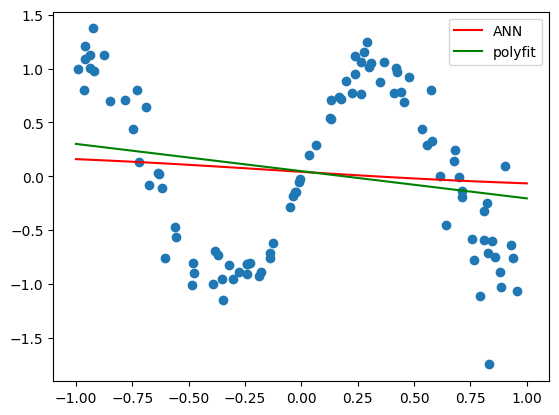

In [153]:
xp = np.linspace(-1,1)
yp = ann.predict(xp)
plt.plot(xp,yp,color='red',label='ANN')
plt.plot(np.linspace(-1,1),np.linspace(-1,1)*res[0]+res[1],color='green',label='polyfit')
plt.scatter(x,y)
plt.legend()

Not fantastic, but you get the idea...You have just created your first ANN for regression!

In fact, it turns out that it exists a mathematical theorem that proves that NNs are optimal approximators:


FOR ANY CONTINUOS FUNCTION FOR A HYPERCUBE [0,1]d TO REAL NUMBERS, AND EVERY POSITIVE EPSILON, THERE EXISTS A SIGMOID BASED 1-HIDDEN LAYER NEURAL NETWORK THAT OBTAINES AT MOST EPSILON ERROR IN FUNCTIONAL SPACE - Cybenko+89

“BIG ENOUGH NETWORK CAN APPROXIMATE, BUT NOT REPRESENT ANY SMOOTH FUNCTION. THE MATH DEMONSTRATION IMPLIES SHOWING THAT NETWORS ARE DENSE IN THE SPACE OF TARGET FUNCTIONS”

So, the approximation theorem tells me that there exists a NN that can approximate any function. It does not tell me which one: this is the alchemia of ML. It does not tell me how to minimize it either!

# Let's make the model more complex

---



In [154]:
tfd = tfp.distributions
tfpl = tfp.layers
tfk = tf.keras
tfkl = tf.keras.layers

ann = tfk.Sequential([
tf.keras.layers.Flatten(input_shape=(1,1)),
tfkl.Dense(30, activation='relu'),
tfkl.Dense(20, activation='relu'),
tfkl.Dense(10, activation='relu'),
tfkl.Dense(5, activation='relu'),
tfkl.Dense(1, activation=None)])
ann.compile(optimizer=tf.optimizers.Adam(),loss='mse')
ann.fit(x,y,batch_size=1,epochs=50)

Epoch 1/50
100/100 [==============================] - 1s 2ms/step - loss: 0.5995
Epoch 2/50
100/100 [==============================] - 0s 2ms/step - loss: 0.5632
Epoch 3/50
100/100 [==============================] - 0s 2ms/step - loss: 0.5373
Epoch 4/50
100/100 [==============================] - 0s 2ms/step - loss: 0.4967
Epoch 5/50
100/100 [==============================] - 0s 2ms/step - loss: 0.3832
Epoch 6/50
100/100 [==============================] - 0s 2ms/step - loss: 0.2658
Epoch 7/50
100/100 [==============================] - 0s 2ms/step - loss: 0.1515
Epoch 8/50
100/100 [==============================] - 0s 2ms/step - loss: 0.1128
Epoch 9/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0822
Epoch 10/50
100/100 [==============================] - 0s 2ms/step - loss: 0.1004
Epoch 11/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0895
Epoch 12/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0931
Epoch 13/50
100/100 [====

2/2 [==============================] - 0s 4ms/step


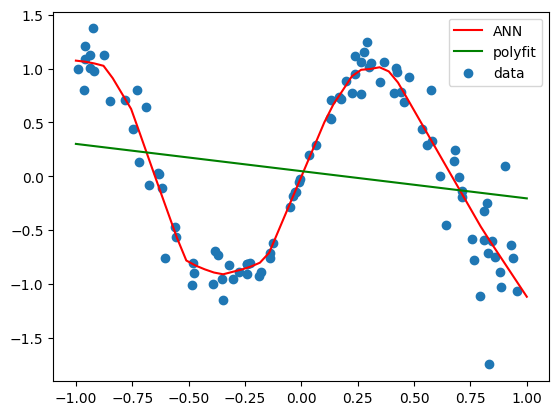

In [155]:
xp = np.linspace(-1,1)
yp = ann.predict(xp)
plt.plot(xp,yp,color='red',label='ANN')
plt.plot(np.linspace(-1,1),np.linspace(-1,1)*res[0]+res[1],color='green',label='polyfit')
plt.scatter(x,y,label='data')
plt.legend()

Which is not that far from the real underlying model...

2/2 [==============================] - 0s 5ms/step


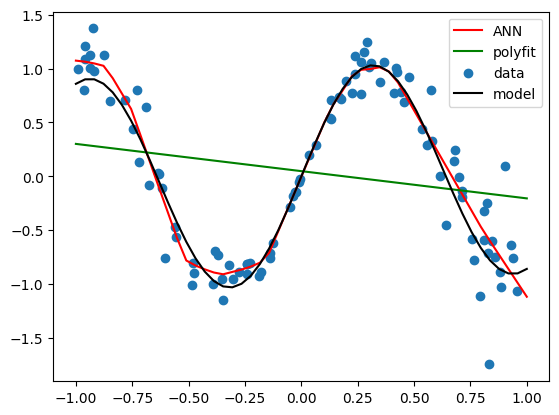

In [156]:
xp = np.linspace(-1,1)
yp = ann.predict(xp)
plt.plot(xp,yp,color='red',label='ANN')
plt.plot(np.linspace(-1,1),np.linspace(-1,1)*res[0]+res[1],color='green',label='polyfit')
plt.scatter(x,y,label='data')
plt.plot(np.linspace(-1,1),0.1*np.linspace(-1,1)+np.sin(5*np.linspace(-1,1)),label='model',color='black')
plt.legend()

7/7 [==============================] - 0s 2ms/step


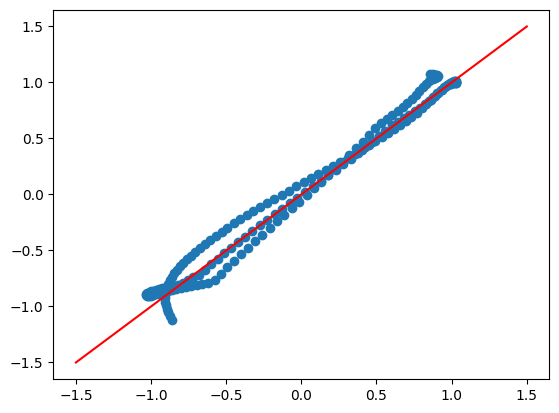

In [157]:
xp = np.linspace(-1.,1.,200)
y_predict = ann.predict(xp)
plt.scatter(0.1*xp+np.sin(5*xp),y_predict)
plt.plot(np.linspace(-1.5,1.5,100),np.linspace(-1.5,1.5,100),color='red')

What if I go beyond my training set?

2/2 [==============================] - 0s 4ms/step


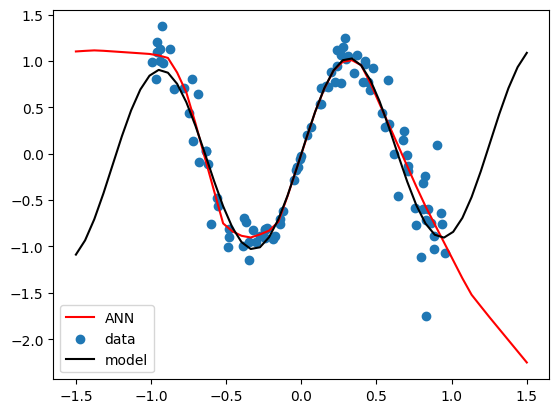

In [158]:
xp = np.linspace(-1.5,1.5)
yp = ann.predict(xp)
plt.plot(xp,yp,color='red',label='ANN')
#plt.plot(np.linspace(-1,1),np.linspace(-1,1)*res[0]+res[1],color='green',label='polyfit')
plt.scatter(x,y,label='data')
plt.plot(np.linspace(-1.5,1.5),0.1*np.linspace(-1.5,1.5)+np.sin(5*np.linspace(-1.5,1.5)),label='model',color='black')
plt.legend()

7/7 [==============================] - 0s 2ms/step


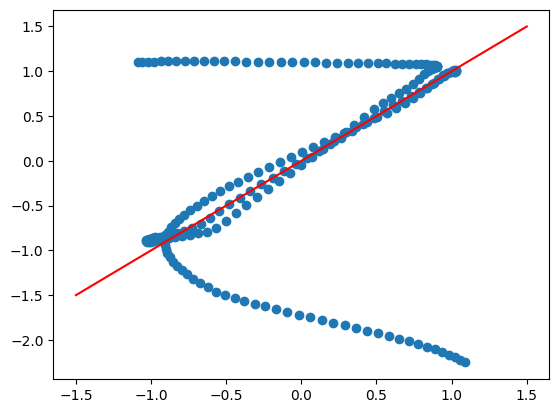

In [159]:
xp = np.linspace(-1.5,1.5,200)
y_predict = ann.predict(xp)
plt.scatter(0.1*xp+np.sin(5*xp),y_predict)
plt.plot(np.linspace(-1.5,1.5,100),np.linspace(-1.5,1.5,100),color='red')

# What about errors? Can we capture the uncertainties in the data?

In [160]:

ann = tfk.Sequential([
tfkl.Input((1,)),
tfkl.Dense(30, activation='relu'),
tfkl.Dense(20, activation='relu'),
tfkl.Dense(10, activation='relu'),
tfkl.Dense(5, activation='relu'),
tfkl.Dense(tfpl.IndependentNormal.params_size(1),activation=None),
tfpl.IndependentNormal(1, tfd.Normal.sample)])


Wow! What's that? We are transforming our model into a probabilsiitc model. Our model now predicts a Normal pdf at every point. We are going to learn the mean and the stanrdarde deviation of the pdf. That way, we let the model capture not only the mean but also the uncertainity.

So now, let's compile this model. Since the output of the network is now a distribution, we are going to maximize the likelihood, or minimize the negative log likelihood.

In [161]:
negloglik = lambda y, rv_y: -rv_y.log_prob(y)
ann.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),loss=negloglik)
ann.fit(x,y,batch_size=1,epochs=400)

Epoch 1/400
100/100 [==============================] - 1s 2ms/step - loss: 1.1891
Epoch 2/400
100/100 [==============================] - 0s 2ms/step - loss: 1.1478
Epoch 3/400
100/100 [==============================] - 0s 2ms/step - loss: 1.1071
Epoch 4/400
100/100 [==============================] - 0s 2ms/step - loss: 1.0551
Epoch 5/400
100/100 [==============================] - 0s 2ms/step - loss: 0.9991
Epoch 6/400
100/100 [==============================] - 0s 2ms/step - loss: 0.9390
Epoch 7/400
100/100 [==============================] - 0s 2ms/step - loss: 0.9070
Epoch 8/400
100/100 [==============================] - 0s 2ms/step - loss: 0.8714
Epoch 9/400
100/100 [==============================] - 0s 2ms/step - loss: 0.8681
Epoch 10/400
100/100 [==============================] - 0s 2ms/step - loss: 0.7884
Epoch 11/400
100/100 [==============================] - 0s 2ms/step - loss: 0.7136
Epoch 12/400
100/100 [==============================] - 0s 2ms/step - loss: 0.6148
Epoch 13/400


# Let's plot the results ...

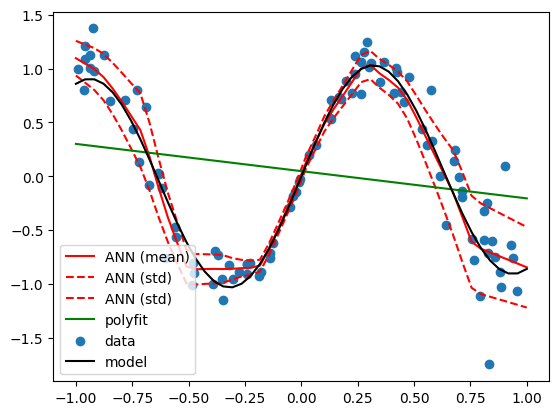

In [162]:
xp = np.linspace(-1,1)
yp = ann(xp).mean()
yp_std = ann(xp).stddev()
plt.plot(xp,yp,color='red',label='ANN (mean)')
plt.plot(xp,yp+yp_std,color='red',label='ANN (std)',ls='--')
plt.plot(xp,yp-yp_std,color='red',label='ANN (std)',ls='--')
plt.plot(np.linspace(-1,1),np.linspace(-1,1)*res[0]+res[1],color='green',label='polyfit')
plt.scatter(x,y,label='data')
plt.plot(np.linspace(-1,1),0.1*np.linspace(-1,1)+np.sin(5*np.linspace(-1,1)),label='model',color='black')
plt.legend()


The model captures now that it is more uncertain towrds the edges of the distribution...

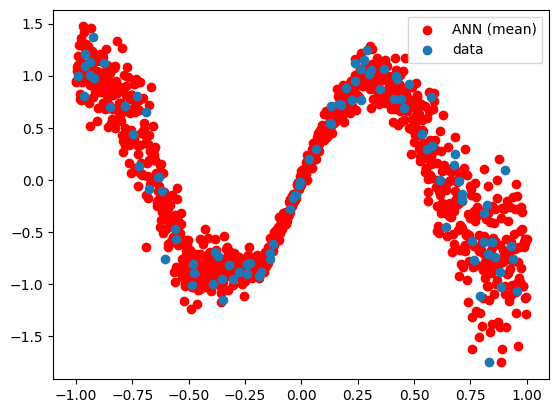

In [163]:
xp = np.linspace(-1,1,1000)
yp = ann(xp).sample()
yp_std = ann(xp).stddev()
plt.scatter(xp,yp,color='red',label='ANN (mean)')
#plt.plot(xp,yp+yp_std,color='red',label='ANN (std)',ls='--')
#plt.plot(xp,yp-yp_std,color='red',label='ANN (std)',ls='--')
#plt.plot(np.linspace(-1,1),np.linspace(-1,1)*res[0]+res[1],color='green',label='polyfit')
plt.scatter(x,y,label='data')
#plt.plot(np.linspace(-1,1),0.1*np.linspace(-1,1)+np.sin(5*np.linspace(-1,1)),label='model',color='black')
plt.legend()

Let's have a look at the epistemic uncertainty

In [164]:
negloglik = lambda y, rv_y: -rv_y.log_prob(y)
nens = 3
ensembles=[]
for i in range(nens):
  ann.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),loss=negloglik)
  ann.fit(x,y,batch_size=1,epochs=150)
  ensembles.append(ann)


Epoch 1/150
100/100 [==============================] - 1s 2ms/step - loss: -0.3726
Epoch 2/150
100/100 [==============================] - 0s 2ms/step - loss: -0.3625
Epoch 3/150
100/100 [==============================] - 0s 2ms/step - loss: -0.3728
Epoch 4/150
100/100 [==============================] - 0s 2ms/step - loss: -0.4206
Epoch 5/150
100/100 [==============================] - 0s 2ms/step - loss: -0.3807
Epoch 6/150
100/100 [==============================] - 0s 2ms/step - loss: -0.3864
Epoch 7/150
100/100 [==============================] - 0s 2ms/step - loss: -0.3548
Epoch 8/150
100/100 [==============================] - 0s 2ms/step - loss: -0.3947
Epoch 9/150
100/100 [==============================] - 0s 2ms/step - loss: -0.3919
Epoch 10/150
100/100 [==============================] - 0s 2ms/step - loss: -0.3726
Epoch 11/150
100/100 [==============================] - 0s 2ms/step - loss: -0.4023
Epoch 12/150
100/100 [==============================] - 0s 2ms/step - loss: -0.3572
E

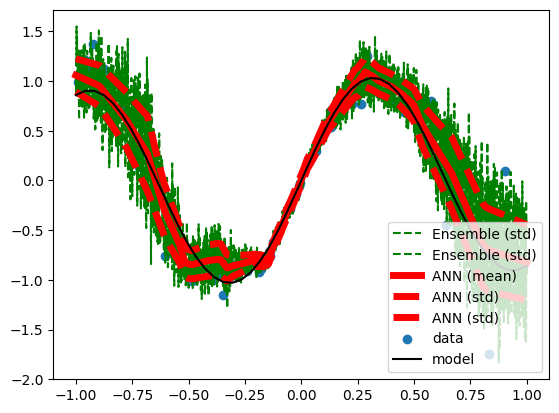

In [165]:
xp = np.linspace(-1,1,2000)
yp = ensembles[0](xp).mean()
yp_std = ensembles[0](xp).stddev()

yp_list=[]
for i in range(nens):
  yp_s = ensembles[i](xp).sample()
  yp_list.append(yp_s)

mu_all  = np.mean(np.array(yp_list),axis=0)
sigma_all = np.std(np.array(yp_list),axis=0)





plt.plot(xp,mu_all+sigma_all,color='green',label='Ensemble (std)',ls='--')
plt.plot(xp,mu_all-sigma_all,color='green',label='Ensemble (std)',ls='--')

plt.plot(xp,yp,color='red',label='ANN (mean)',lw=5)
plt.plot(xp,yp+yp_std,color='red',label='ANN (std)',ls='--',lw=5)
plt.plot(xp,yp-yp_std,color='red',label='ANN (std)',ls='--',lw=5)

plt.scatter(x,y,label='data')
plt.plot(np.linspace(-1,1),0.1*np.linspace(-1,1)+np.sin(5*np.linspace(-1,1)),label='model',color='black')
plt.legend()

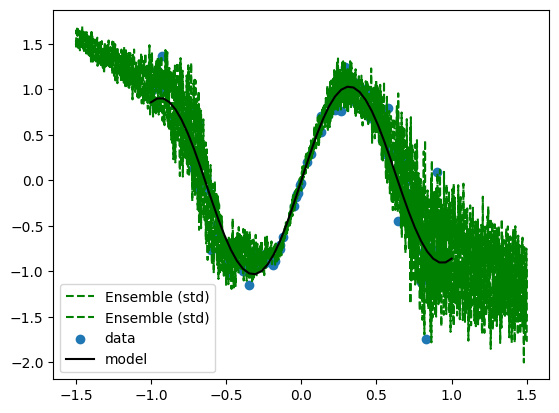

In [166]:
xp = np.linspace(-1.5,1.5,2000)
yp = ensembles[0](xp).mean()
yp_std = ensembles[0](xp).stddev()

yp_list=[]
for i in range(nens):
  yp_s = ensembles[i](xp).sample()
  yp_list.append(yp_s)

mu_all  = np.mean(np.array(yp_list),axis=0)
sigma_all = np.std(np.array(yp_list),axis=0)





plt.plot(xp,mu_all+sigma_all,color='green',label='Ensemble (std)',ls='--')
plt.plot(xp,mu_all-sigma_all,color='green',label='Ensemble (std)',ls='--')

#plt.plot(xp,yp,color='red',label='ANN (mean)',lw=5)
#plt.plot(xp,yp+yp_std,color='red',label='ANN (std)',ls='--',lw=5)
#plt.plot(xp,yp-yp_std,color='red',label='ANN (std)',ls='--',lw=5)

plt.scatter(x,y,label='data')
plt.plot(np.linspace(-1,1),0.1*np.linspace(-1,1)+np.sin(5*np.linspace(-1,1)),label='model',color='black')
plt.legend()

# Beyond Gaussian Posteriors ...

The posterior distribution ($p_w(y|x)$) is not always well described by a Gaussian

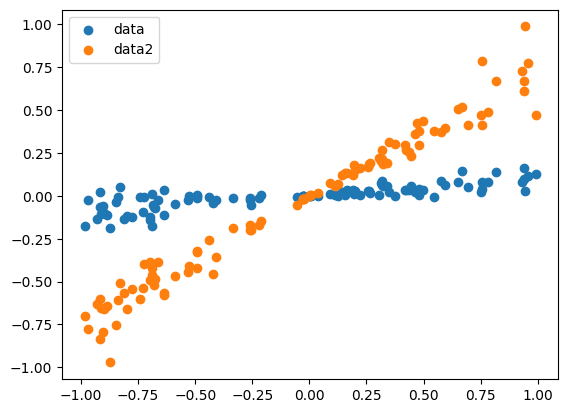

In [167]:
x = np.random.uniform(-1,1,100)
y1 = 0.1*x+np.random.normal(0,0.025,100)*3*x
y2 = 0.75*x+np.random.normal(0,0.025,100)*5*x
plt.scatter(x,y1,label='data')
plt.scatter(x,y2,label='data2')
plt.legend()
plt.show()

xbig = np.concatenate((x,x))
ybig = np.concatenate((y1,y2))

In [168]:
negloglik = lambda y, rv_y: -rv_y.log_prob(y)
ann.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),loss=negloglik)
ann.fit(xbig,ybig,batch_size=1,epochs=400)

Epoch 1/400
200/200 [==============================] - 1s 2ms/step - loss: 3.0658
Epoch 2/400
200/200 [==============================] - 0s 2ms/step - loss: 0.6113
Epoch 3/400
200/200 [==============================] - 0s 2ms/step - loss: 0.2474
Epoch 4/400
200/200 [==============================] - 0s 2ms/step - loss: 0.0726
Epoch 5/400
200/200 [==============================] - 0s 2ms/step - loss: -0.0471
Epoch 6/400
200/200 [==============================] - 0s 2ms/step - loss: -0.1304
Epoch 7/400
200/200 [==============================] - 0s 2ms/step - loss: -0.1767
Epoch 8/400
200/200 [==============================] - 0s 2ms/step - loss: -0.2234
Epoch 9/400
200/200 [==============================] - 0s 2ms/step - loss: -0.2937
Epoch 10/400
200/200 [==============================] - 0s 2ms/step - loss: -0.3250
Epoch 11/400
200/200 [==============================] - 0s 2ms/step - loss: -0.3878
Epoch 12/400
200/200 [==============================] - 0s 2ms/step - loss: -0.3990
Epoch

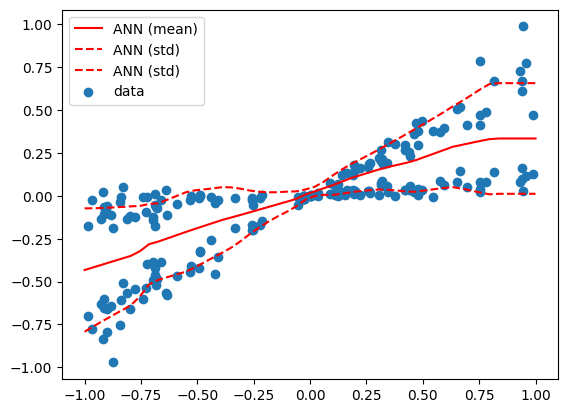

In [169]:
xp = np.linspace(-1,1)
yp = ann(xp).mean()
yp_std = ann(xp).stddev()
plt.plot(xp,yp,color='red',label='ANN (mean)')
plt.plot(xp,yp+yp_std,color='red',label='ANN (std)',ls='--')
plt.plot(xp,yp-yp_std,color='red',label='ANN (std)',ls='--')

plt.scatter(xbig,ybig,label='data')

plt.legend()

The mean of the Gaussian does not describe my data well

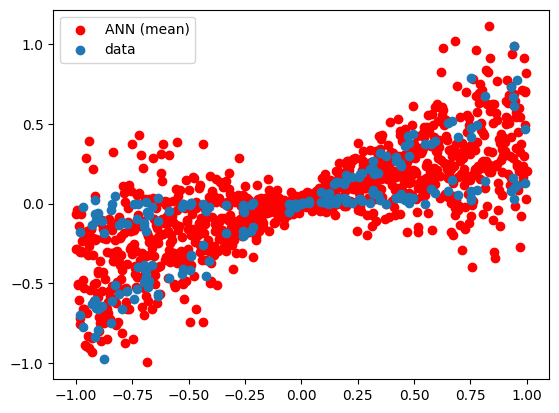

In [170]:
xp = np.linspace(-1,1,1000)
yp = ann(xp).sample()
yp_std = ann(xp).stddev()
plt.scatter(xp,yp,color='red',label='ANN (mean)')
#plt.plot(xp,yp+yp_std,color='red',label='ANN (std)',ls='--')
#plt.plot(xp,yp-yp_std,color='red',label='ANN (std)',ls='--')
#plt.plot(np.linspace(-1,1),np.linspace(-1,1)*res[0]+res[1],color='green',label='polyfit')
plt.scatter(xbig,ybig,label='data')
#plt.plot(np.linspace(-1,1),0.1*np.linspace(-1,1)+np.sin(5*np.linspace(-1,1)),label='model',color='black')
plt.legend()

Let's try with a different posterior distribution

In [171]:
ann = tfk.Sequential([
tf.keras.layers.Flatten(input_shape=(1,1)),
tfkl.Dense(30, activation='relu'),
tfkl.Dense(20, activation='relu'),
tfkl.Dense(10, activation='relu'),
tfkl.Dense(5, activation='relu'),
tfkl.Dense(tfpl.MixtureNormal.params_size(2, 1),activation=None),
tfpl.MixtureNormal(2,1)])

In [172]:
negloglik = lambda y, rv_y: -rv_y.log_prob(y)
ann.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),loss=negloglik)
ann.fit(xbig,ybig,batch_size=1,epochs=400)

Epoch 1/400
200/200 [==============================] - 2s 2ms/step - loss: 0.4425
Epoch 2/400
200/200 [==============================] - 0s 2ms/step - loss: 0.1497
Epoch 3/400
200/200 [==============================] - 0s 2ms/step - loss: -0.1208
Epoch 4/400
200/200 [==============================] - 0s 2ms/step - loss: -0.1312
Epoch 5/400
200/200 [==============================] - 0s 2ms/step - loss: -0.1916
Epoch 6/400
200/200 [==============================] - 0s 2ms/step - loss: -0.2769
Epoch 7/400
200/200 [==============================] - 0s 2ms/step - loss: -0.3208
Epoch 8/400
200/200 [==============================] - 0s 2ms/step - loss: -0.3304
Epoch 9/400
200/200 [==============================] - 0s 2ms/step - loss: -0.3614
Epoch 10/400
200/200 [==============================] - 0s 2ms/step - loss: -0.3451
Epoch 11/400
200/200 [==============================] - 0s 2ms/step - loss: -0.3798
Epoch 12/400
200/200 [==============================] - 0s 2ms/step - loss: -0.4526
Epo

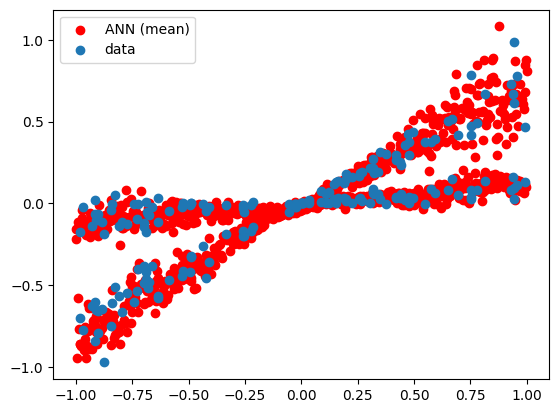

In [173]:
xp = np.linspace(-1,1,1000)
yp = ann(xp).sample()
yp_std = ann(xp).stddev()
plt.scatter(xp,yp,color='red',label='ANN (mean)')
#plt.plot(xp,yp+yp_std,color='red',label='ANN (std)',ls='--')
#plt.plot(xp,yp-yp_std,color='red',label='ANN (std)',ls='--')
#plt.plot(np.linspace(-1,1),np.linspace(-1,1)*res[0]+res[1],color='green',label='polyfit')
plt.scatter(xbig,ybig,label='data')
#plt.plot(np.linspace(-1,1),0.1*np.linspace(-1,1)+np.sin(5*np.linspace(-1,1)),label='model',color='black')
plt.legend()